# 1 - Exploratory Data Analysis

## A. Download Dataset

In [ ]:
!wget -O Give-Me-Some-Credit.csv https://raw.githubusercontent.com/mch-fauzy/Data-Science/main/Give-Me-Some-Credit/Give%20Me%20Some%20Credit.csv

--2021-02-08 15:09:56--  https://raw.githubusercontent.com/mch-fauzy/Data-Science/main/Give-Me-Some-Credit/Give%20Me%20Some%20Credit.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930900 (909K) [text/plain]
Saving to: ‘Give-Me-Some-Credit.csv’

Give-Me-Some-Credit 100%[===================>] 909.08K  --.-KB/s    in 0.05s   

2021-02-08 15:09:56 (19.3 MB/s) - ‘Give-Me-Some-Credit.csv’ saved [930900/930900]



## B. Read Dataset

In [ ]:
import pandas as pd


> Class : Person experienced 90 days past due delinquency or worse : Y/N

> RevolvingUtilizationOfUnsecuredLines : Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits : percentage

> age : Age of borrower in years : integer

> NumberOfTime30-59DaysPastDueNotWorse : Number of times borrower has been 30-59 days past due but no worse in the last 2 years. : integer

> DebtRatio : Monthly debt payments, alimony,living costs divided by monthy gross income : percentage

> MonthlyIncome : Monthly income : real

> NumberOfOpenCreditLinesAndLoans : Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) : integer

> NumberOfTimes90DaysLate : Number of times borrower has been 90 days or more past due. : integer

> NumberRealEstateLoansOrLines : Number of mortgage and real estate loans including home equity lines of credit : integer

> NumberOfTime60-89DaysPastDueNotWorse : Number of times borrower has been 60-89 days past due but no worse in the last 2 years. : integer

> NumberOfDependents : Number of dependents in family excluding themselves (spouse, children etc.) : integer

In [ ]:
df = pd.read_csv('Give-Me-Some-Credit.csv')
print(df.shape)
df.head()

(20052, 11)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,Class
0,1.000000,54,0,0.000000,1666.0,1,0,0,0,0.0,0
1,0.497080,40,0,0.510355,4200.0,8,0,2,0,3.0,0
2,0.797681,40,1,0.047542,3070.0,6,0,0,0,2.0,0
3,0.043304,61,0,244.000000,NaN,14,0,0,0,0.0,0
4,0.810945,49,0,4.000000,NaN,1,0,0,0,0.0,0


## C. Check Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RevolvingUtilizationOfUnsecuredLines  20052 non-null  float64
 1   age                                   20052 non-null  int64  
 2   NumberOfTime30.59DaysPastDueNotWorse  20052 non-null  int64  
 3   DebtRatio                             20052 non-null  float64
 4   MonthlyIncome                         16380 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       20052 non-null  int64  
 6   NumberOfTimes90DaysLate               20052 non-null  int64  
 7   NumberRealEstateLoansOrLines          20052 non-null  int64  
 8   NumberOfTime60.89DaysPastDueNotWorse  20052 non-null  int64  
 9   NumberOfDependents                    19603 non-null  float64
 10  Class                                 20052 non-null  int64  
dtypes: float64(4), 

In [ ]:
df['NumberOfTime30.59DaysPastDueNotWorse'].unique()

array([ 0,  1,  2,  6, 98,  3,  5,  4,  8,  7,  9, 96, 11, 13, 10, 12])

## D. Heatmap Correlation

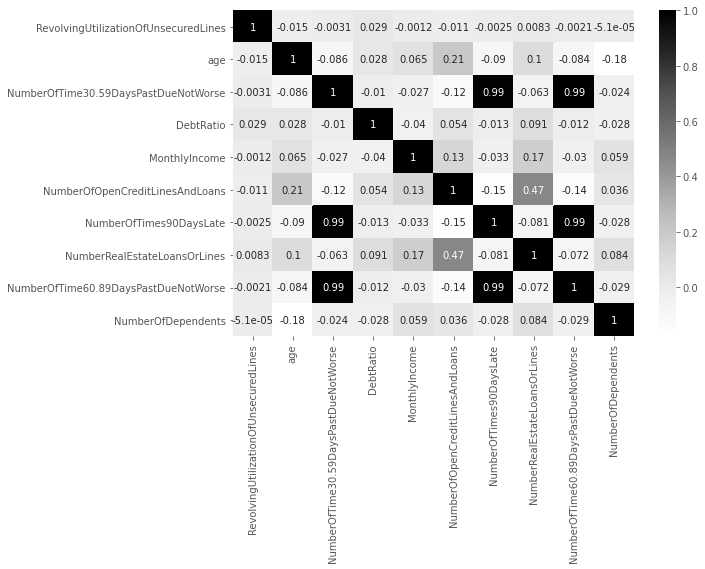

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') #visual figure style
df_drop_class = df.drop('Class', axis=1)
plt.figure(figsize=(9,6)) 
heatmap = sns.heatmap(df_drop_class.corr(),annot=True,cmap='Greys')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)  
plt.show()

Terlihat bahwa 'Number of Time 30-50 Days Past Due', 'Number of Time 60-89 Days Past Due' dan 'Number of Time 90 Days Late' bersifat multicolinearity (bernilai 0.99). Dimana menunjukan variabel tersebut dipengaruhi oleh lebih dari 1 variabel dependant lainnya 

## E. Visual Model Sebelum Di Training

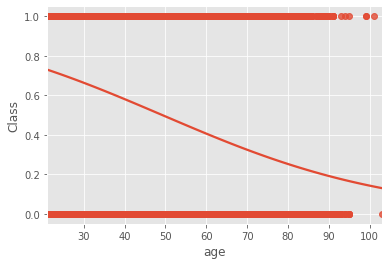

In [ ]:
sns.regplot(x='age',y='Class', data=df, logistic=True, ci=None)
plt.show()

**Model Sebelum di Train:**

Jika ditinjau dari umur 50+ memilki probablitas mendapat pinjaman lebih kecil daripada yang berumur dibawah 50

## F. Overall Data Summary Statistics
This helps you to detect any anomaly in your dataset. Such as variables with high variance or extremely skewed data.

Jika data pada kolom terdistribusi normal maka nilai mean dan median akan hampir sama.

Jika nilai mean dan median terlalu berbeda jauh maka data bersifat skew /  ada outliers (lebih aman jika data NaN diisi dengan median atau dihapus saja)

In [ ]:
df.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents,Class
count,20052.000000,20052.000000,20052.000000,20052.000000,1.638000e+04,20052.000000,20052.000000,20052.000000,20052.000000,19603.000000,20052.000000
mean,4.215801,49.320816,1.342360,341.686365,6.174355e+03,8.225813,1.120138,1.007979,0.984291,0.849360,0.500000
std,128.066468,14.245196,8.652902,2551.343871,1.032283e+04,5.449829,8.658182,1.275143,8.636487,1.174851,0.500012
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.075194,39.000000,0.000000,0.182335,3.152250e+03,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.437054,49.000000,0.000000,0.392574,5.000000e+03,7.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,0.943711,59.000000,1.000000,0.881600,7.583000e+03,11.000000,0.000000,2.000000,0.000000,2.000000,1.000000
max,8328.000000,103.000000,98.000000,307001.000000,1.072500e+06,57.000000,98.000000,29.000000,98.000000,20.000000,1.000000


# 2 - Build a Model

## A. Select Columns for Modelling

In [ ]:
columns = ['age', 
           'DebtRatio', 
           'MonthlyIncome',
           'NumberOfOpenCreditLinesAndLoans',
           'RevolvingUtilizationOfUnsecuredLines',
           'Class']
data = df[columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   20052 non-null  int64  
 1   DebtRatio                             20052 non-null  float64
 2   MonthlyIncome                         16380 non-null  float64
 3   NumberOfOpenCreditLinesAndLoans       20052 non-null  int64  
 4   RevolvingUtilizationOfUnsecuredLines  20052 non-null  float64
 5   Class                                 20052 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 940.1 KB


In [ ]:
data.head()

,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,RevolvingUtilizationOfUnsecuredLines,Class
0,54,0.000000,1666.0,1,1.000000,0
1,40,0.510355,4200.0,8,0.497080,0
2,40,0.047542,3070.0,6,0.797681,0
3,61,244.000000,NaN,14,0.043304,0
4,49,4.000000,NaN,1,0.810945,0


## B. Data Monthly Income Summary Statisctics

In [ ]:
data['MonthlyIncome'].describe()

count    1.638000e+04
mean     6.174355e+03
std      1.032283e+04
min      0.000000e+00
25%      3.152250e+03
50%      5.000000e+03
75%      7.583000e+03
max      1.072500e+06
Name: MonthlyIncome, dtype: float64

## C. Fill Missing Value
Karena Mean dan Median pada ['MonthlyIncome'] berbeda jauh maka digunakan nilai Median untuk mengisi Missing Value

In [ ]:
Monthly_Income_Median = data['MonthlyIncome'].median()
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(Monthly_Income_Median)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   20052 non-null  int64  
 1   DebtRatio                             20052 non-null  float64
 2   MonthlyIncome                         20052 non-null  float64
 3   NumberOfOpenCreditLinesAndLoans       20052 non-null  int64  
 4   RevolvingUtilizationOfUnsecuredLines  20052 non-null  float64
 5   Class                                 20052 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 940.1 KB


## D. Define Predictor (x) and Predicted Data (y)

In [ ]:
# numpy.asarray -> Not create a copy of object and can be modify
# numpy.array -> create a copy of object and cant be modify 

In [ ]:
import numpy as np
#Predictor
x = np.array(data.drop('Class', axis = 1))
#x = np.array(data['age'])
x[0:5]

array([[5.40000000e+01, 0.00000000e+00, 1.66600000e+03, 1.00000000e+00,
        9.99999900e-01],
       [4.00000000e+01, 5.10354677e-01, 4.20000000e+03, 8.00000000e+00,
        4.97080234e-01],
       [4.00000000e+01, 4.75415170e-02, 3.07000000e+03, 6.00000000e+00,
        7.97680928e-01],
       [6.10000000e+01, 2.44000000e+02, 5.00000000e+03, 1.40000000e+01,
        4.33041090e-02],
       [4.90000000e+01, 4.00000000e+00, 5.00000000e+03, 1.00000000e+00,
        8.10945274e-01]])

In [ ]:
#predicted
y = np.array(data['Class'])
y[0:5]

array([0, 0, 0, 0, 0])

## E. Standardization



### Standard Scaler
StandardScaler : It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution. It is more useful in classification than regression.

    variance / MSE = (mean - data ke)^2 / n - 1 = sigma^2 (Untuk data sample gunakan n-1, untuk seluruh data gunakan n)

    Standar deviasi / RMSE = sqrt(variance)

Agar range data tidak terlalu jauh dan sama" bernilai penting oleh algoritma

Kita dapat menghitung nilai standardisasi (z) dengan menggunakan rumus Z = (x - u)/s dengan x adalah tiap nilai, u adalah rata-rata dan s adalah standard deviasi.

In [ ]:
# Standar Scaler -> membuat std menjadi 1 dan mean menjadi 0 (atau mendekati 0)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x.mean(axis=0))
print(x.std(axis=0))

[ 2.32453638e-16 -5.66960092e-18 -4.81916079e-17 -9.07136148e-17
  2.12610035e-18]
[1. 1. 1. 1. 1.]


### MinMax Scaler

In [ ]:
# MinMax -> Membuat independent variable/feature berada pada range tertentu
# bisa juga untuk normalisasi data 0-1

#from sklearn.preprocessing import MinMaxScaler
#msc = MinMaxScaler(feature_range=(0,1))
#x = msc.fit_transform(x)

### Normalizer

In [ ]:
# row based
#from sklearn.preprocessing import Normalizer
#nm = Normalizer()
#x = nm.fit(x).transform(x)


## F. Train and Test Split

The whole data set generally split into 80% train and 20% test data set (general rule of thumb). The 80% train data is being used for model training, while the rest 20% is used for checking how the model generalized on unseen data set.

In [ ]:
from sklearn.model_selection import train_test_split

#random_state itu sama dengan random.seed dimana agar data yg displit akan sama jika di run ulang
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
x_train[0:5]

array([[-0.51392754, -0.13378365, -0.04060766, -0.04143589, -0.0328605 ],
       [-1.0755344 , -0.133817  , -0.15087818, -0.40842901, -0.02544211],
       [-0.09272241, -0.13392619,  0.21847451, -0.77542213, -0.03281193],
       [-0.86493183, -0.13386632,  0.29876857, -0.22493245, -0.03270842],
       [ 1.59209815, -0.13369999, -0.42387799, -0.04143589, -0.03045639]])

## G. Modelling (Binomial Logistic Regression)

This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

The version of Logistic Regression in Scikit-learn, support regularization. 
> Regularization is a technique used to solve the overfitting problem in machine learning models.

>**C** parameter indicates **inverse of regularization strength** which must be a positive float. Smaller values specify stronger regularization. 
Now lets fit our model with train set:

  Algorithm to use in the optimization problem:

    For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

    For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

    ‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

    ‘liblinear’ and ‘saga’ also handle L1 penalty

    ‘saga’ also supports ‘elasticnet’ penalty

    ‘liblinear’ does not support setting penalty='none'


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#C -> inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization
#solver -> Optimizer to find parameters -> [liblinear] for small dataset
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(x_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### a. Predict using in-sample test data

In [ ]:
# Prediction Value
y_predict = LR.predict(x_test)
#y_predict = LR.predict(x_test[:,1].reshape(1, -1))
y_predict[0:5]

array([1, 0, 1, 1, 1])

### b. Compare the predicted value with actual value

In [ ]:
# Actual Value
y_test[0:5]

array([1, 0, 1, 1, 1])

### c. Predict Probability
**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X)

In [ ]:
yhat_prob = LR.predict_proba(x_test)

#check Class yg diprediksi
print(LR.classes_) #use _ because private variable
print('Probabilitas Class 0: {}\nProbabilitas Class 1: {}'.format(yhat_prob[0:5, 0], yhat_prob[0:5, 1]))

#print(yhat_prob[0:5])


[0 1]
Probabilitas Class 0: [0.29456724 0.55346829 0.43007813 0.36247743 0.37245584]
Probabilitas Class 1: [0.70543276 0.44653171 0.56992187 0.63752257 0.62754416]


In [ ]:
print(x_test[:5,0])

[-1.77754296  0.5390853  -0.51392754 -1.0755344  -1.14573525]


### d. Trained Model Graphs

#### Age Predictor

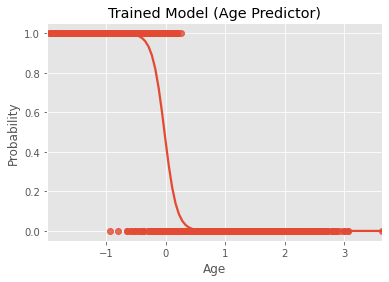

In [ ]:
#plt.scatter(x_test[:,0], yhat_prob[:,0], color = 'blue')
#plt.scatter(x_test[:,0], yhat_prob[:,1], color = 'green')

sns.regplot(x=x_test[:,0], y=y_predict, data=data, logistic=True, ci=None)
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Trained Model (Age Predictor)')
plt.show()

Secara Visual jika ditinjau dari umur, maka umur 50+ (Nilai Sebelum Standard Scaler)tidak diperkenankan mendapatkan pinjaman (masuk Class 0).

Umur 40-49 bisa dipertimbankan sesuai dengan kebijakan masing" Bank

#### Debt Ratio Predictor

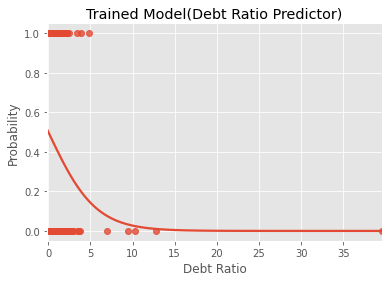

In [ ]:
sns.regplot(x=x_test[:,1], y=y_predict, data=data, logistic=True, ci=None)
plt.xlabel('Debt Ratio')
plt.ylabel('Probability')
plt.title('Trained Model(Debt Ratio Predictor)')
plt.show()

#### Montly Income Predictor

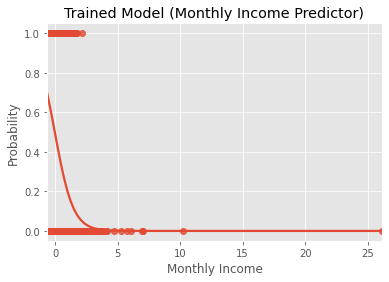

In [ ]:
sns.regplot(x=x_test[:,2], y=y_predict, data=data, logistic=True, ci=None)
plt.xlabel('Monthly Income')
plt.ylabel('Probability')
plt.title('Trained Model (Monthly Income Predictor)')
plt.show()

#### Open Credit Predictor

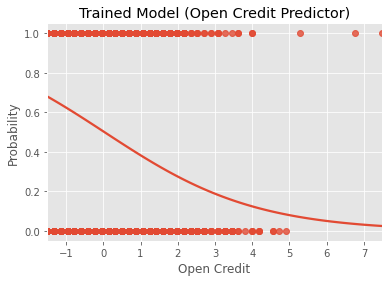

In [ ]:
sns.regplot(x=x_test[:,3], y=y_predict, data=data, logistic=True, ci=None)
plt.xlabel('Open Credit')
plt.ylabel('Probability')
plt.title('Trained Model (Open Credit Predictor)')
plt.show()

#### Revolving Utilization Predictor

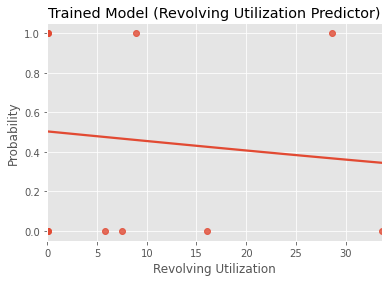

In [ ]:
sns.regplot(x=x_test[:,4], y=y_predict, data=data, logistic=True, ci=None)
plt.xlabel('Revolving Utilization')
plt.ylabel('Probability')
plt.title('Trained Model (Revolving Utilization Predictor)')
plt.show()

## H. Evaluation



### a. Model Accuracy

For imbalanced data sets, accuracy is not a good evaluation metric.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_predict)
print('Accuracy of the Model is {:0.2f}'.format(accuracy))

Accuracy of the Model is 0.61


### b. Confusion Matrix:

`TP / True Positive: when an actual observation was positive and the model prediction is also positive`

`TN / True Negative: when an actual observation was negative and the model prediction is also negative`

`FP / False Positive: when an actual observation was negative but the model prediction is positive`

`FN / False Negative: when an actual observation was positive but the model prediction is negative`

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1,0]) # labels -> urutan class
#cnf_matrix = pd.crosstab(y_test, y_predict,rownames=['Actual'], colnames=['Predicted'], margins=True)
#np.set_printoptions(precision=2)
#print(cnf_matrix2)
print(cnf_matrix, '\n')
#> format rata kanan dengan length 4
print('TP: {} FN: {:>4}\nFP: {:>4} TN: {}'.format(cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]))

[[1219  750]
 [ 800 1242]] 

TP: 1219 FN:  750
FP:  800 TN: 1242


#### Visualization

In [ ]:
'''
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    
    #for text values of confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    '''

'\nimport itertools\ndef plot_confusion_matrix(cm, classes, normalize=False, title=\'Confusion matrix\', cmap=plt.cm.Blues):\n    \n    """\n    This function prints and plots the confusion matrix.\n    Normalization can be applied by setting `normalize=True`.\n    """\n    if normalize:\n        cm = cm.astype(\'float\') / cm.sum(axis=1)[:, np.newaxis]\n        print("Normalized confusion matrix")\n    else:\n        print(\'Confusion matrix, without normalization\')\n\n    print(cm)\n\n    plt.imshow(cm, interpolation=\'nearest\', cmap=cmap)\n    plt.title(title)\n    plt.colorbar()\n    tick_marks = np.arange(len(classes))\n    plt.xticks(tick_marks, classes, rotation=45)\n    plt.yticks(tick_marks, classes)\n\n    fmt = \'.2f\' if normalize else \'d\'\n    \n    #for text values of confusion matrix\n    thresh = cm.max() / 2.\n    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):\n        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color

In [ ]:
#plot_confusion_matrix(cnf_matrix, classes=['Class=1','Class=0'],normalize= False,  title='Confusion matrix')

#### Visualization Conf. Matrix

      1     0
1  1219   750
0   800  1242

TP: 1219 FN: 750
FP:  800 TN: 1242


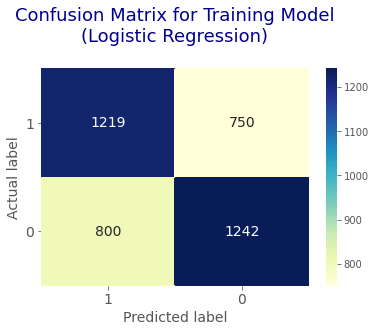

In [ ]:
import seaborn as sns

# Form confusion matrix as a DataFrame
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[1, 0])
confusion_matrix_df = pd.DataFrame(cnf_matrix, index=[1, 0], columns=[1, 0])
print(confusion_matrix_df)
print('\nTP: {} FN: {:>3}\nFP: {:>4} TN: {}'.format(cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

### c. Classification Report

In [ ]:
print(classification_report(y_test, y_predict, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.60      0.62      0.61      1969
           0       0.62      0.61      0.62      2042

    accuracy                           0.61      4011
   macro avg       0.61      0.61      0.61      4011
weighted avg       0.61      0.61      0.61      4011



### d. Precision, Recall and F1 score

We have already calculated the classification accuracy then the obvious question would be, what is the need for precision, recall and F1-score? The answer is accuracy is not a good measure when a class imbalance exists in the data set. A data set is said to be balanced if the dependent variable includes an approximately equal proportion of both classes (in binary classification case). For example, if the diabetes dataset includes 50% samples with diabetic and 50% non-diabetic patience, then the data set is said to be balanced and in such case, we can use accuracy as an evaluation metric. But in real-world it is often not the actual case.

Presisi Class 1

In [ ]:
# Precision: determines the accuracy of positive predictions.
# Menunjukan rasio Label yg diprediksi BENAR dengan Label yg salah prediksi
Precision = cnf_matrix[0][0]/(cnf_matrix[0][0] + cnf_matrix[1][0])
print('{:0.2f}'.format(Precision))

0.60


Recall Class 1

In [ ]:
# Recall: determines the fraction of positives that were correctly identified.
# Mennunjukan rasio Label yg diprediksi BENAR dengan Label yang diprediksi SALAH
Recall = cnf_matrix[0][0]/(cnf_matrix[0][0] + cnf_matrix[0][1])
print('{:0.2f}'.format(Recall))

0.62


F1_score Class 1

In [ ]:
# F1 Score: is a weighted harmonic mean of precision and recall with the 
# best score of 1 and the worst score of 0. 
# F1 score conveys the balance between the precision and the recall.
F1_score = 2*Precision*Recall / (Precision + Recall)
print('{:0.2f}'.format(F1_score))

0.61


### e. ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

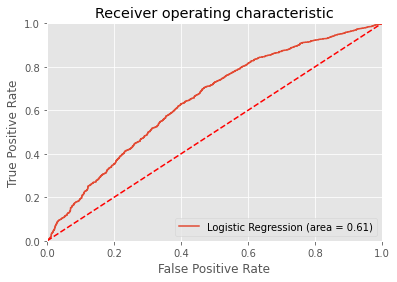

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# The Value
yhat_class1_prob = LR.predict_proba(x_test)[:,1]
logit_roc_auc = roc_auc_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, yhat_class1_prob)

# Plot and setting
#plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = {:0.2f})'.format(logit_roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### f. Log Loss

Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.


In [ ]:
from sklearn.metrics import log_loss
logLoss = log_loss(y_test, yhat_prob)
print('Log Loss: {:.2f}'.format(logLoss))

Log Loss: 0.66


# 3 - Summary about the Model

`The Model needs another model as benchmark model`

or

`Using another classification algortihm`

